Author: Saman Paidar Nia

All resources are listed at the bottom of the page.

Ranning k-means directly on the graph similarity and visualize them. 

In [1]:
# Get important libraries for this class.
import numpy as np
import matplotlib.pyplot as plt
import warnings
import csv
import random
import math
#--------------------------------------------------------
from IPython.display import clear_output
from scipy.spatial.distance import squareform, pdist
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from scipy.cluster.vq import kmeans, vq
from sklearn.metrics import normalized_mutual_info_score
warnings.filterwarnings("ignore")

In [2]:
# Normalize each non-zero feature of the input vector.
# All this process called standardization.
# We normalize the vector before passing it into a similarity computing.
# After standardization each feature is normally distributed:
def standardization(X):
    return normalize(X, axis=0)

In [3]:
# Compute the random walk of the normalized graph laplacian:
# L = D-1 L = I – D-1 W :
def laplacian(A):
    S = np.sum(A, 0)
    D = np.diag(S)
    D = LA.matrix_power(D, -1)
    L = np.dot(D, A)
    return L

In [4]:
# Compute normalize linearly for each matrix column.
# After that we have minimum value 0 and maximum value 1 :
def normalization(V):
    return (V - min(V)) / (max(V) - min(V))

In [5]:
# Compute the correlation distance between vectors u and v:
# 1 − (u − ū) . (v − v̅) / (||(u − ū)||2||(v − v̅)||2)
class Correlation_Similarity:
    def get_matrix(self, Data):
        X = standardization(Data)
        X = pdist(X, 'correlation')
        X = squareform(X)
        L = laplacian(X)
        Y = np.apply_along_axis(normalization, 1, L)
        return Y

In [6]:
# Compute the cosine distance between vectors u and v:
# 1 −  (u . v) / (||u||2||v||2)
class Cosine_Similarity:
    def get_matrix(self, Data):
        X = standardization(Data)
        X = pdist(X, 'cosine')
        X = squareform(X)
        L = laplacian(X)
        Y = np.apply_along_axis(normalization, 1, L)
        return Y

In [7]:
class Similarity_Dataset_Iterator():
    def __init__(self, data, labels, similarity):
        self.data = data
        self.labels = labels
        self.matrix = similarity.get_matrix(data)
        self.data_size = self.matrix.shape[0]
        self.current_index = 0
    def next_batch(self, num):
        data=self.matrix.transpose()
        labels=self.labels
        idx = np.arange(0 , len(data))
        np.random.shuffle(idx)
        idx = idx[:num]
        data_shuffle = [data[ i] for i in idx]
        labels_shuffle = [labels[ i] for i in idx]
        return data_shuffle, labels_shuffle
    def whole_dataset(self):
        return (self.matrix.transpose(), self.labels)

In [8]:
# Fetching dataset: 
def read_iris_data(similarity):
    with open('E:/Autoencoder_Clustering/Iris_dataset/Iris_Dataset/iris.csv') as csvfile:        
        csvreader = csv.reader(csvfile)
        next(csvreader, None) # skip header
        dataset = list(csvreader)
    random.shuffle(dataset)
    datatrain = dataset[:int(len(dataset))]
    data = [data for data in datatrain]
    labels = [data[4] for data in datatrain]   
    return Similarity_Dataset_Iterator(data, labels, similarity)

In [9]:
# Call Correlation_Similarity as similarity dataset.
trainSet_correlation = read_iris_data(Correlation_Similarity())

In [10]:
# Call Cosine_Similarity as similarity dataset.
trainSet_cosine = read_iris_data(Cosine_Similarity())

In [11]:
n_input = trainSet_correlation.data_size #--------- Number of input data.
n_clusters = 3 #----------------------------------- Number of clusters.

In [12]:
def k_means_(X, n_clusters):
    kmeans_centroids,_ =  kmeans(X,n_clusters)
    kmeans_, _ = vq(X, kmeans_centroids)
    return kmeans_

In [13]:
data_cor, labels_cor = trainSet_correlation.whole_dataset() #-- Allocation of data and labels from similarity matrix (n*n) 
data_cos, labels_cos = trainSet_cosine.whole_dataset() #------- Allocation of data and labels from similarity matrix (n*n)

In [14]:
k_means_indx_cos = k_means_(data_cos, n_clusters)
k_means_nmi_cos = (normalized_mutual_info_score(labels_cos, k_means_indx_cos))

In [15]:
k_means_indx_cor = k_means_(data_cor, n_clusters)
k_means_nmi_cor = (normalized_mutual_info_score(labels_cor, k_means_indx_cor))

In [16]:
print("NMI score of KMeans on Cosine: ---------------- {:0.2f}".format(k_means_nmi_cos*100))
print("NMI score of KMeans on Correlation: ----------- {:0.2f}".format(k_means_nmi_cor*100))

NMI score of KMeans on Cosine: ---------------- 100.00
NMI score of KMeans on Correlation: ----------- 93.06


Here we visualize the original graph simlarity (150 * 150) from 10 different angles.

In [17]:
origin_label_cos = np.array(trainSet_cosine.whole_dataset()[1]).astype(int)
origin_label_cor = np.array(trainSet_correlation.whole_dataset()[1]).astype(int)

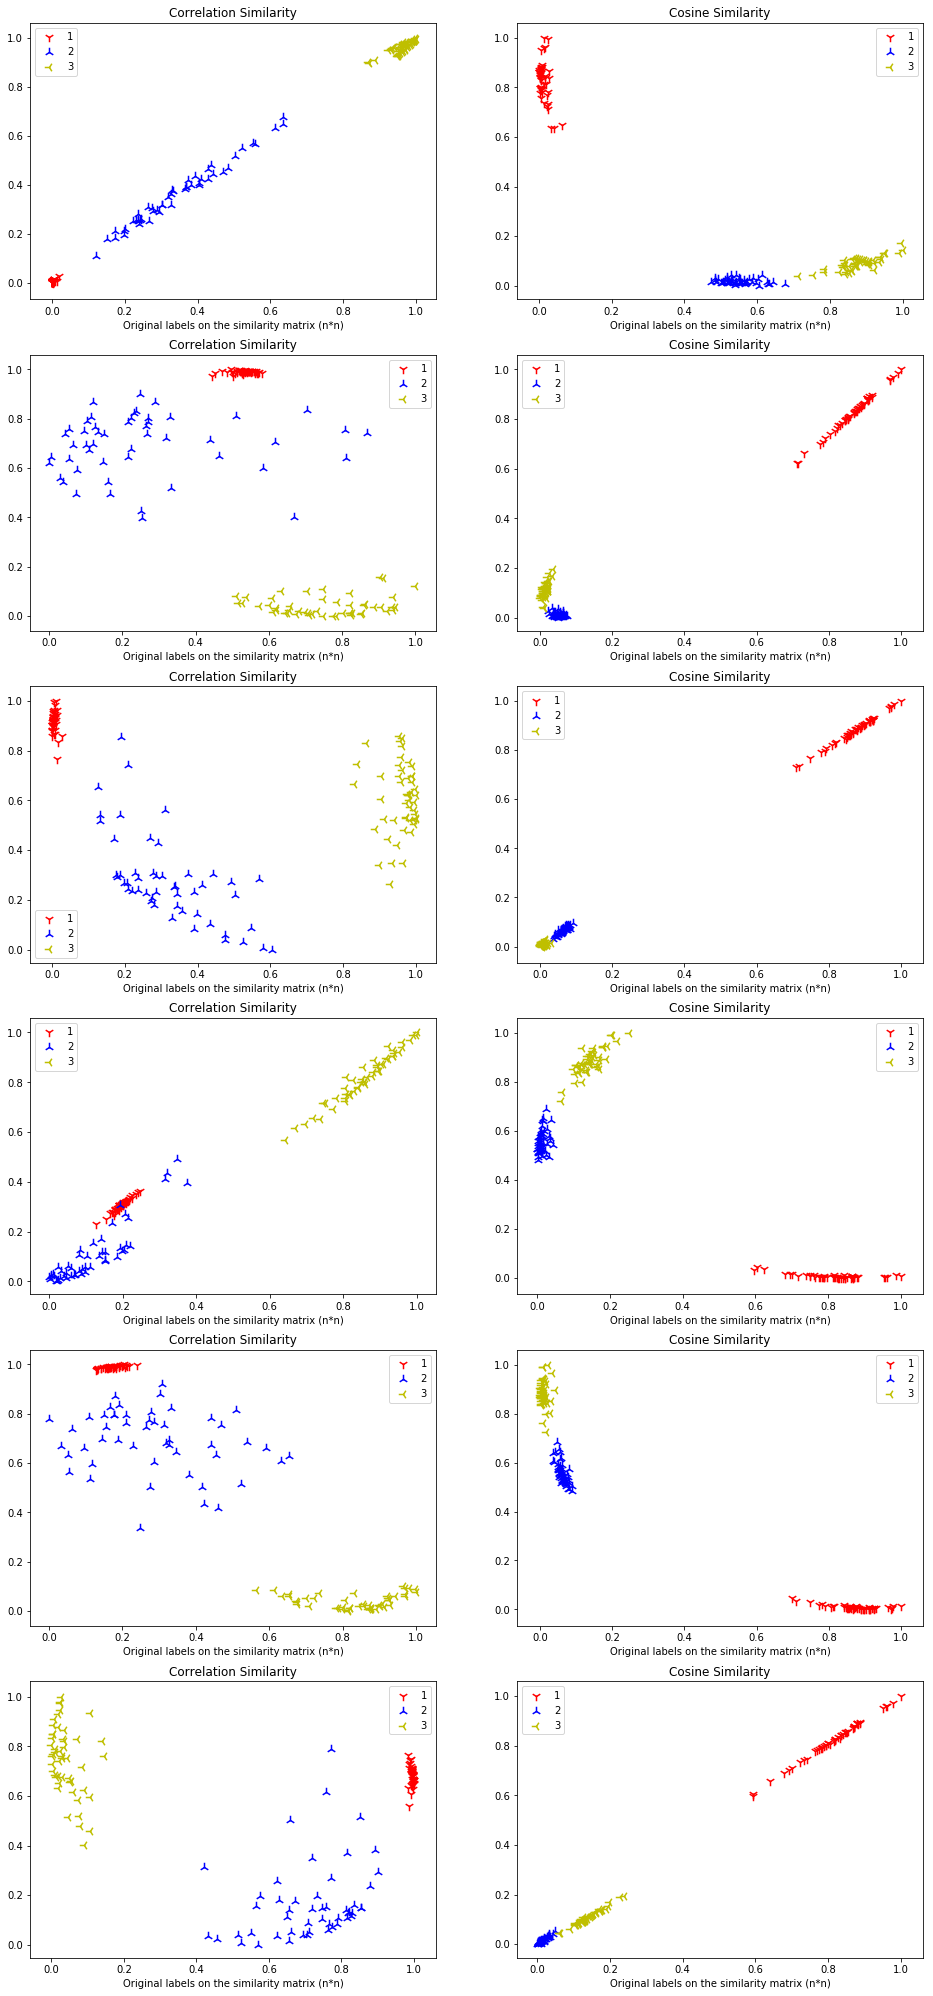

In [18]:
colors = [('r', '1'),('b', '2'),('y','3')]
plt.figure(figsize=(16, 60))
list_of_lists = [0, 2, 4, 6, 8, 10]
for j in list_of_lists:
    for num in range(3):
        plt.subplot(10,2,j+1)
        plt.scatter([data_cor[:,j+1][i] for i in range(len(origin_label_cor)) if origin_label_cor[i] == num],
                    [data_cor[:,j+2][i] for i in range(len(origin_label_cor)) if origin_label_cor[i] == num],
                    90, label=str(num+1), color = colors[num][0], marker=colors[num][1])
        plt.title('Correlation Similarity')
        plt.xlabel('Original labels on the similarity matrix (n*n)')
        plt.legend()
        plt.subplot(10,2,(j+2))
        plt.scatter([data_cos[:,j+1][i] for i in range(len(origin_label_cos)) if origin_label_cos[i] == num],
                    [data_cos[:,j+2][i] for i in range(len(origin_label_cos)) if origin_label_cos[i] == num],
                    90, label=str(num+1), color = colors[num][0], marker=colors[num][1])
        plt.title('Cosine Similarity')
        plt.xlabel('Original labels on the similarity matrix (n*n)')
        plt.legend()
plt.show()

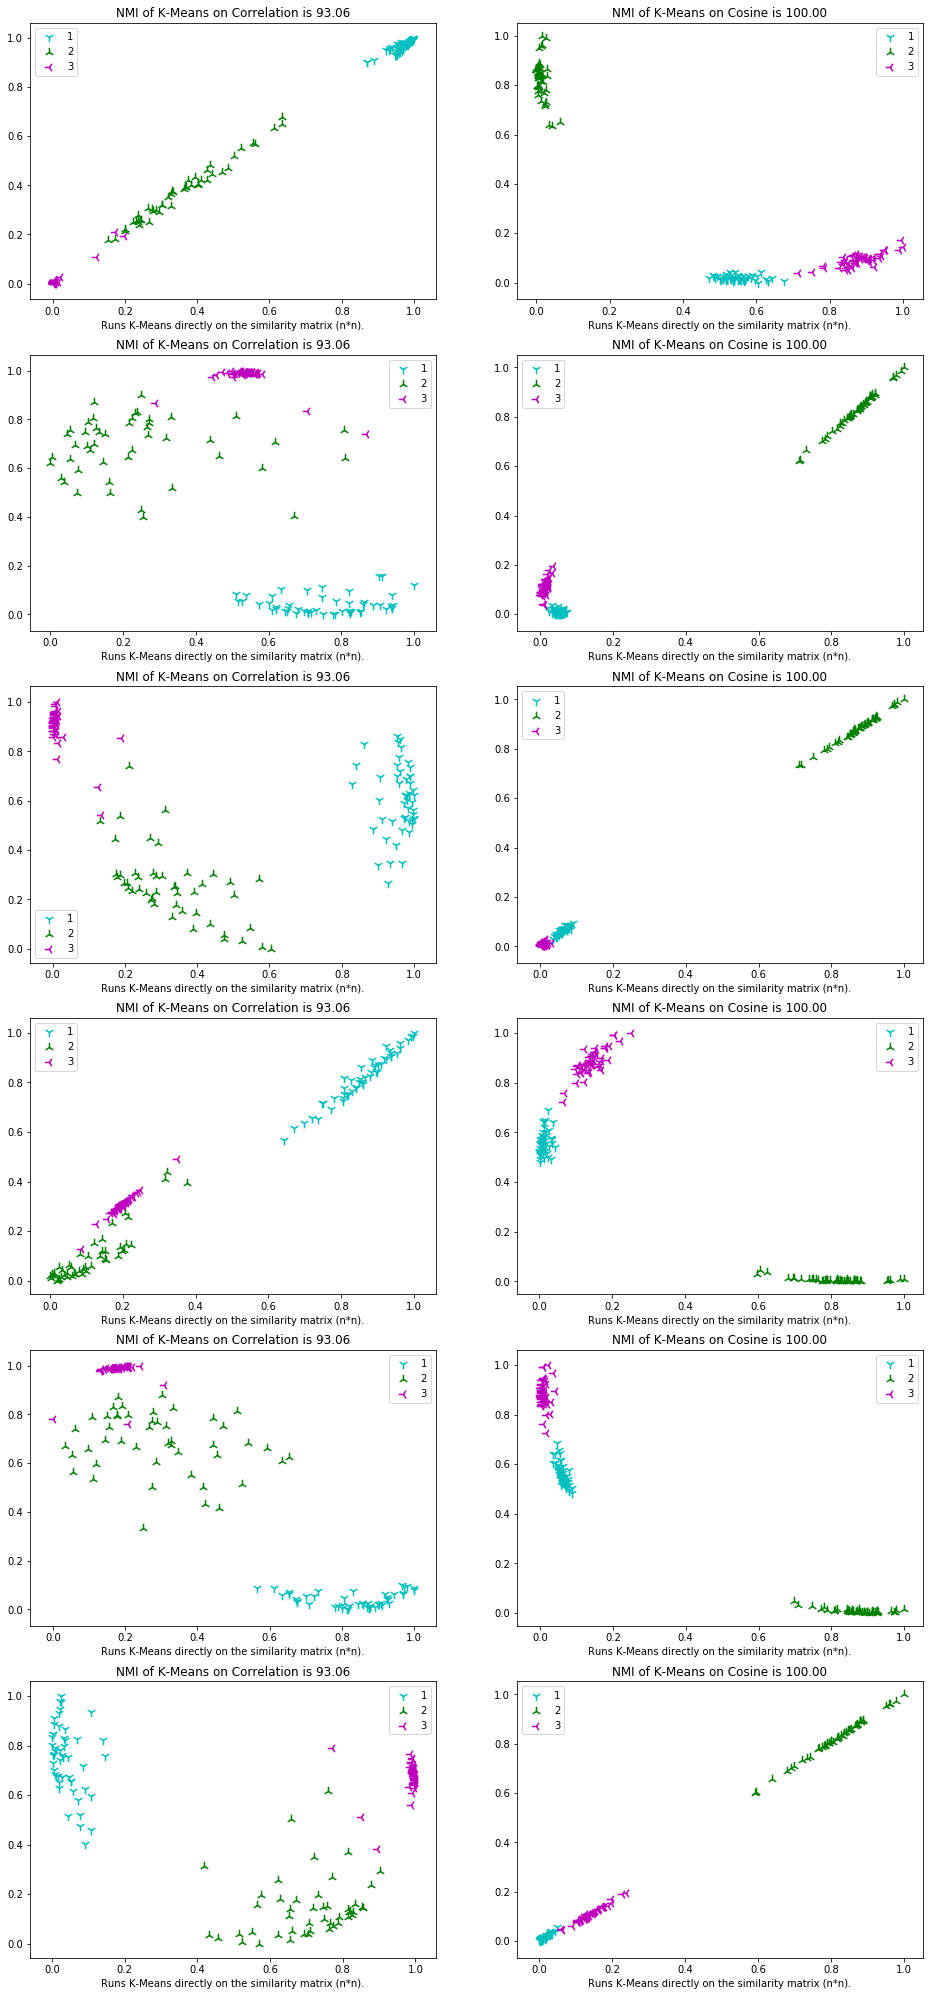

In [19]:
colors = [('c', '1'),('g', '2'),('m','3')]
plt.figure(figsize=(16, 60))
list_of_lists = [0, 2, 4, 6, 8, 10]
for j in list_of_lists:
    for num in range(3):
        plt.subplot(10,2,j+1)
        plt.scatter([data_cor[:,j+1][i] for i in range(len(k_means_indx_cor)) if k_means_indx_cor[i] == num],
                    [data_cor[:,j+2][i] for i in range(len(k_means_indx_cor)) if k_means_indx_cor[i] == num],
                    90, label=str(num+1), color = colors[num][0], marker=colors[num][1])
        plt.title(('NMI of K-Means on Correlation is {:0.2f}').format(k_means_nmi_cor*100))
        plt.xlabel('Runs K-Means directly on the similarity matrix (n*n).')
        plt.legend()
        plt.subplot(10,2,j+2)
        plt.scatter([data_cos[:,j+1][i] for i in range(len(k_means_indx_cos)) if k_means_indx_cos[i] == num],
                    [data_cos[:,j+2][i] for i in range(len(k_means_indx_cos)) if k_means_indx_cos[i] == num],
                    90, label=str(num+1), color = colors[num][0], marker=colors[num][1])
        plt.title(('NMI of K-Means on Cosine is {:0.2f}').format(k_means_nmi_cos*100))
        plt.xlabel('Runs K-Means directly on the similarity matrix (n*n).')
        plt.legend()
plt.show()

____________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________

Refrences:

SciPy (the library) Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ [Online; accessed 2018-02-20]. Here’s an example of a BibTeX entry:

@Misc{, author = {Eric Jones and Travis Oliphant and Pearu Peterson and others}, title = {{SciPy}: Open source scientific tools for {Python}}, year = {2001--}, url = "http://www.scipy.org/", note = {[Online; accessed

NumPy & SciPy:

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37 (publisher link)

IPython:

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53 (publisher link)

Matplotlib:

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55 (publisher link)

Scikit-learn:

Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011) (publisher link)

Jupyter Notebooks:

@conference{Kluyver:2016aa, Author = {Thomas Kluyver and Benjamin Ragan-Kelley and Fernando P{\'e}rez and Brian Granger and Matthias Bussonnier and Jonathan Frederic and Kyle Kelley and Jessica Hamrick and Jason Grout and Sylvain Corlay and Paul Ivanov and Dami{\'a}n Avila and Safia Abdalla and Carol Willing}, Booktitle = {Positioning and Power in Academic Publishing: Players, Agents and Agendas}, Editor = {F. Loizides and B. Schmidt}, Organization = {IOS Press}, Pages = {87 - 90}, Title = {Jupyter Notebooks -- a publishing format for reproducible computational workflows}, Year = {2016}}